In [1]:
# Write a python web scraping program to extract the data from MTA
# We want to take a look at what is the difference betwen the price
# of regular fare and reduced far

import requests
from bs4 import BeautifulSoup

In [2]:
# get the data
data = requests.get("https://new.mta.info/fares-and-tolls/subway-bus-and-staten-island-railway")

# load data into bs4
soup = BeautifulSoup(data.text, "html.parser")

In [3]:
# look for the table with 
metro_card = "mta-flex-grow"
normal_div = soup.find_all('div', {'class': metro_card})

# Let's also make a simple regex
# Base Pay-Per-Ride fare: $2.75
# The line has a colon (:) and a dollar sign ($)

import re

mta_re = re.compile(r'(.*):(.*$.*)')
metro_fare_list = []

# Looping all the segment with "mta-flex-grow"
for div in normal_div:
    if (div.find('h3')):
        fare_type = div.find('h3').text
        
        # Run into issue with spaces
        fare_type = fare_type.replace(u'\xa0', u' ')
    
    for li in div.find_all('li'):
        # Maching with regular expression
        match = mta_re.match(li.text)
        if match:
            ticket_name = match.group(1)
            ticket_price = match.group(2).strip()
            
            print(fare_type.ljust(20), '|', 
                  ticket_name.ljust(40), '|', 
                  ticket_price)
            
            # Need to remove the dollar sign and convert to double
            ticket_price = float(ticket_price.replace("$", ""))
            
            # Putting everything into a list
            metro_fare_list.append([fare_type, ticket_name, ticket_price])

MetroCard Fares      | Base Pay-Per-Ride fare                   | $2.75
MetroCard Fares      | Single ride fare                         | $3
MetroCard Fares      | 30-Day Unlimited Ride                    | $127
MetroCard Fares      | 7-Day Unlimited Ride                     | $33
MetroCard Fares      | Express Bus                              | $6.75
MetroCard Fares      | Express Bus Plus 7-Day                   | $62
Reduced Fares        | Subway, Local Bus, Select Bus            | $1.35
Reduced Fares        | 30-Day Unlimited Ride                    | $63.50
Reduced Fares        | 7-Day Unlimited Ride                     | $16.50
Reduced Fares        | Express Bus (off-peak only)              | $3.35


In [4]:
# Inspect the metro_fare_list
for metro_fare in metro_fare_list:
    print(metro_fare)

['MetroCard Fares', 'Base Pay-Per-Ride fare', 2.75]
['MetroCard Fares', 'Single ride fare', 3.0]
['MetroCard Fares', '30-Day Unlimited Ride', 127.0]
['MetroCard Fares', '7-Day Unlimited Ride', 33.0]
['MetroCard Fares', 'Express Bus', 6.75]
['MetroCard Fares', 'Express Bus Plus 7-Day', 62.0]
['Reduced Fares', 'Subway, Local Bus, Select Bus', 1.35]
['Reduced Fares', '30-Day Unlimited Ride', 63.5]
['Reduced Fares', '7-Day Unlimited Ride', 16.5]
['Reduced Fares', 'Express Bus (off-peak only)', 3.35]


In [5]:
# Finally! Able to put everything into a Pandas DataFrame
import pandas as pd

headers = ['Fares Type', 'Card Type', 'Price']
metro_df = pd.DataFrame(metro_fare_list,
                        columns = headers)

In [6]:
# Review all the fares
metro_df

,Fares Type,Card Type,Price
0,MetroCard Fares,Base Pay-Per-Ride fare,2.75
1,MetroCard Fares,Single ride fare,3.00
2,MetroCard Fares,30-Day Unlimited Ride,127.00
3,MetroCard Fares,7-Day Unlimited Ride,33.00
4,MetroCard Fares,Express Bus,6.75
5,MetroCard Fares,Express Bus Plus 7-Day,62.00
6,Reduced Fares,"Subway, Local Bus, Select Bus",1.35
7,Reduced Fares,30-Day Unlimited Ride,63.50
8,Reduced Fares,7-Day Unlimited Ride,16.50
9,Reduced Fares,Express Bus (off-peak only),3.35


In [7]:
# Create a pivot: group by fare types, distinct card type, price
pivot_df = metro_df.pivot(index='Fares Type', 
                          columns='Card Type', 
                          values='Price')

# Review the pivoted dataframe
pivot_df

Card Type,30-Day Unlimited Ride,7-Day Unlimited Ride,Base Pay-Per-Ride fare,Express Bus,Express Bus (off-peak only),Express Bus Plus 7-Day,Single ride fare,"Subway, Local Bus, Select Bus"
Fares Type,,,,,,,,
MetroCard Fares,127.0,33.0,2.75,6.75,NaN,62.0,3.0,NaN
Reduced Fares,63.5,16.5,NaN,NaN,3.35,NaN,NaN,1.35


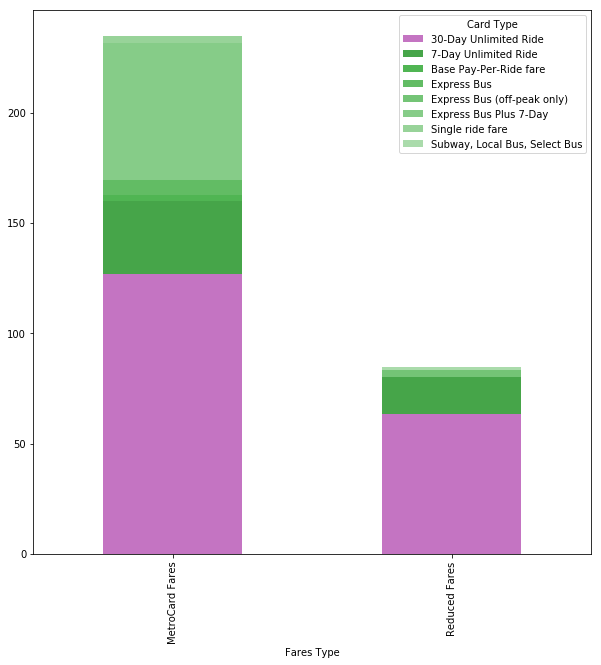

In [9]:
# https://www.colorhexa.com/74c476
colors = ["#c474c2", 
          "#46a549", "#50b553","#62bc64", "#74c476", "#86cc88", "#98d399", "#aadbab"]

# https://pstblog.com/2016/10/04/stacked-charts
pivot_df.plot.bar(stacked = True, 
                  color = colors,
                  figsize = (10,10))